<a href="https://colab.research.google.com/github/Nohgyumin0812/ER_ratio_momentum/blob/main/QES_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install yfinance
!pip install pyfolio
!pip install bt
!pip install finance-datareader
import matplotlib.pyplot as plt
from matplotlib import dates
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import yfinance
import pyfolio as pf
import bt
import FinanceDataReader as fdr

In [47]:
stock = fdr.StockListing('KRX')
stock['Market'].unique()
stock = stock[stock['Market'] != 'KONEX']
stock
# 모멘텀: 5, 20, 60, 120, 240
start_date = '2022-01-01'
momentum_df= []
stock_Code = list(stock['Code'].unique())
stock_Name = list(stock['Name'].unique())
close_idx = 3
momentum_list = []

stock = stock.reset_index(drop=True)
code_position = stock['Market'] == 'KOSPI'
stock.loc[code_position, 'Code'] = stock.loc[code_position, 'Code'] + '.KS'
code_position = stock['Market'] == 'KOSDAQ'
stock.loc[code_position, 'Code'] = stock.loc[code_position, 'Code'] + '.KQ'
stock = stock[stock['Marcap'] > 200000000000]
stock_list = list(stock['Code'])
df = yfinance.download(stock_list, start= start_date)['Close']
df.columns = ['' if col == 'Ticker' or col == 'Date' else col for col in df.columns]

[*********************100%%**********************]  948 of 948 completed
ERROR:yfinance:
50 Failed downloads:
ERROR:yfinance:['046890', '036830', '247540', '036930', '200130', '009520', '243070', '035900', '086450', '058470', '003380', '067160', '215200', '213420', '222800', '196170', '078340', '183300', '091700', '348210', '060250', '131970', '137400', '237690', '069080', '253450', '287410', '215000', '145020', '064760', '383310', '319660', '074600', '033340.KQ', '039030', '056190', '403870', '293490', '272290', '166090', '195940', '240810', '393890', '122870', '035760', '084850', '141080', '214150', '263750', '214450']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


In [48]:
momentum_df = []
def momentum_error(stock, diff_day):
  stock_price = df[stock]
  now = stock_price[-1]

  if now - stock_price[-diff_day] >= 0 :
    momentum = now /stock_price[-diff_day] -1
    momentum_list.append(momentum)
  else:
    momentum_list.append('없음')

i = 0
for symbol in stock_list:
  momentum_error(symbol, 5)
  momentum_error(symbol, 20)
  momentum_error(symbol, 60)
  momentum_error(symbol, 120)
  momentum_error(symbol, 240)
  momentum_df.append([stock_Name[i],* momentum_list])
  momentum_list = []
  i += 1
momentum_df = pd.DataFrame(momentum_df, columns = ['종목명', 'momentum_5', 'momentum_20', 'momentum_60', 'momentum_120', 'momentum_240'])

momentum_df = momentum_df.apply(lambda x: x.replace('없음', np.nan))
surge_condition = momentum_df['momentum_5'] > 0.2
momentum_df = momentum_df[~surge_condition]
long_momentum_df = momentum_df.dropna(inplace = False)
long_momentum_df = long_momentum_df.reset_index().drop('index', axis = 1)
stock = stock[['Code', 'Name']]
stock['종목명'] = stock['Name']
stock = stock[['종목명', 'Code']]

long_momentum_df = pd.merge(long_momentum_df, stock, on = '종목명')
long_momentum_df

ER_list = []
for i in range(long_momentum_df.shape[0]):
  ret_1year = long_momentum_df.iloc[i, 5]
  std_1year = df[long_momentum_df.iloc[0, 6]].iloc[-252:].pct_change().std(axis = 0 )
  ER_list.append(ret_1year / std_1year)

long_momentum_df = long_momentum_df.assign(ER = ER_list)
long_momentum = long_momentum_df.sort_values(by = 'ER', ascending = False).reset_index().drop('index', axis = 1).head(10)
long_momentum_lst = long_momentum['Code']

121


<ipython-input-48-4a77f00ad82f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['종목명'] = stock['Name']


In [49]:
long_momentum_lst

0    257720.KQ
1    003230.KS
2    089030.KQ
3    042700.KS
4    267260.KS
5    031980.KQ
6    232140.KQ
7    033100.KQ
8    018290.KQ
9    241710.KQ
Name: Code, dtype: object

<ipython-input-50-1ae6d5fbed94>:8: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.tight_layout()
<ipython-input-50-1ae6d5fbed94>:8: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  plt.tight_layout()
<ipython-input-50-1ae6d5fbed94>:8: UserWarning: Glyph 53080 (\N{HANGUL SYLLABLE KON}) missing from current font.
  plt.tight_layout()
<ipython-input-50-1ae6d5fbed94>:8: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from current font.
  plt.tight_layout()
<ipython-input-50-1ae6d5fbed94>:8: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  plt.tight_layout()
<ipython-input-50-1ae6d5fbed94>:8: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  plt.tight_layout()
<ipython-input-50-1ae6d5fbed94>:8: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  plt.tight_layout()
<ipython-input-50-1ae6d5fbed94>:8: UserWarning: Glyph 54408 (\N

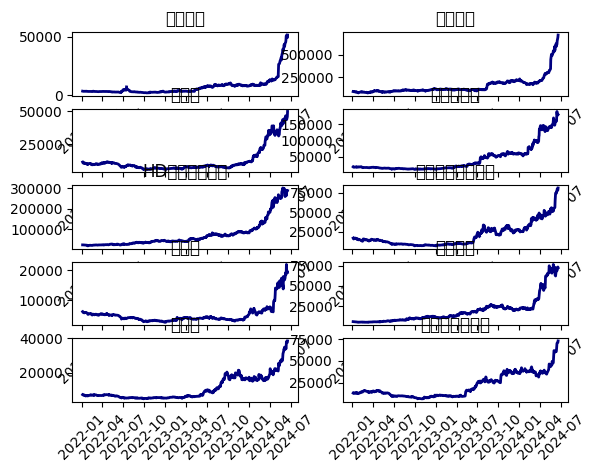

In [50]:
for i in range(len(long_momentum_lst)):
  plt.subplot(5,2,i+1)
  plt.plot(df[long_momentum_lst[i]], color="navy" , linewidth = 2)
  name = long_momentum_df[long_momentum_df['Code'] == long_momentum_lst[i]]['종목명'].values[0]
  plt.title(name)
  plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [93]:
import datetime
stock_df = fdr.StockListing('KRX')
stock_df = stock_df[stock_df['Market']!='KONEX']
symbols = list(stock_df['Code'])
i = 0
start_date = '2024-06-18'
"""
### 날짜 추가분####
all_data_plus = pd.DataFrame()
for symbol in symbols:
   i+=1
   data = fdr.DataReader(symbol = symbol, start = start_date)
   data['symbol'] = symbol
   all_data_plus = pd.concat([all_data_plus, data], axis = 0 )
   print(all_data_plus)

all_data_plus.rename(columns ={'Unnamed: 0':'Date'}, inplace= True)
all_data_plus = all_data_plus.pivot_table(index = 'Date', columns = 'symbol', values = 'Close')
all_data_plus.index.name = None
all_data_plus.columns.name = None
all_data = pd.concat([all_data, all_data_plus], axis = 0)
print(all_data)
### 날짜 추가분####
"""

all_data = df.dropna(axis = 1)

returns_12m = all_data.pct_change(252)
std_12m = all_data.pct_change(252).std()
er_momentum = returns_12m / std_12m
er_momentum = er_momentum.dropna(axis = 0)

print(er_momentum)

from datetime import datetime, timedelta
import FinanceDataReader as fdr

def calc_returns(prices, days):
    return (prices - prices.shift(days)) / prices.shift(days)


##종목 선정###################################종목개수 수정하려면 여기서#######3
def momentum_score(prices, direction, i):

    if direction == "long":
        er_momentum_top10 = er_momentum.iloc[i].nlargest(20).index.tolist()
        return er_momentum_top10

def momentum_portfolios(prices, i):
    long_position = momentum_score(prices, 'long', i)
    short_position = momentum_score(prices, 'short', i)
    momentum_portfolio = long_position
    return momentum_portfolio, short_position

def cagr(df):
    first_date = df.iloc[0]['Date']
    last_date = df.iloc[-1]['Date']
    time_diff = (last_date - first_date).days / 365.25
    start_val = df.iloc[0]['Portfolio Value']
    end_val = df.iloc[-1]['Portfolio Value']
    cagr = (end_val / start_val) ** (1 / time_diff) - 1
    return cagr * 100

def inform_ratio(returns):
    excess_returns = returns['Daily Return'] - returns['Daily_kospi']
    mean_excess_returns = excess_returns.mean()
    std_excess_returns = excess_returns.std()
    information_ratio = mean_excess_returns / std_excess_returns
    return information_ratio

def mdd(returns):
  returns['maximum_price'] = returns['Portfolio Value'].cummax()
  returns['Drawdown'] = (returns['Portfolio Value'] - returns['maximum_price']) / returns['maximum_price']
  mdd = returns['Drawdown'].min()
  return mdd

first_initial_capital =  100
initial_capital = 100
results = {}
date_list = []

for i in range(0, len(er_momentum.index) - 1,10):
    # 기준 날짜 및 다음 날짜 설정

    current_date = er_momentum.index[i].strftime('%Y-%m-%d')
    date_list.append(current_date)
    next_date = er_momentum.index[i + 1]
    # 기준 날짜의 종가를 기준으로, 종목 선정
    selected_symbols = momentum_portfolios(all_data, i)[0]
    print(current_date, selected_symbols)

    all_data_return = all_data.pct_change(5)


    # 종목별 투자 금액 계산
    allocation_long = initial_capital / len(selected_symbols)
    # 기준 날짜 종가를 기준으로, 종목별 매수 가격 계산
    prices_long = all_data.loc[current_date, selected_symbols]
    shares_long = allocation_long / prices_long
    # 다음 날짜 종가를 기준으로, 포트폴리오 가치 계산
    portfolio_value_long = (shares_long * all_data.loc[next_date, selected_symbols]).sum()

    before_portfolio_value = initial_capital
    portfolio_value = portfolio_value_long
    # 결과를 데이터프레임에 추가
    results[current_date] ={
        'Portfolio Value': portfolio_value,
        'Cumu Return': (portfolio_value - first_initial_capital) / first_initial_capital,
        'Daily Return': (portfolio_value/before_portfolio_value) -1}
    # 초기 투자금 업데이트
    initial_capital = portfolio_value

results = pd.DataFrame(results).T.reset_index()
results.columns = ['Date', 'Portfolio Value', 'Cumu Return', 'Daily Return']
results['Date'] = pd.to_datetime(results['Date'])

##inform ratio 위한 병합
start = er_momentum.index[0]
end = er_momentum.index[-1]
df_kospi = yfinance.download('^KS11', start+ timedelta(days=-5), end)['Close'].pct_change()
df_kospi = pd.DataFrame(df_kospi).reset_index().rename(columns={'index':'Date','Close':'Daily_kospi'})
results = pd.merge(results, df_kospi,on = 'Date')
##########################################

print(results)
print("cagr:", cagr(results))
print("information_ratio:", inform_ratio(results))
print('mdd:', mdd(results))


            000020.KS  000050.KS  000070.KS  000080.KS  000100.KS  000120.KS  \
Date                                                                           
2023-01-12  -2.223148  -5.058442  -3.563558  -1.508171  -0.438627  -0.837768   
2023-01-13  -2.160725  -5.262880  -3.538867  -1.239979  -0.368294  -0.718313   
2023-01-16  -2.075193  -5.318146  -3.103838  -1.373320  -0.285061  -0.696189   
2023-01-17  -2.215202  -5.096557  -3.305280  -1.542179  -0.445635  -0.754849   
2023-01-18  -2.239953  -5.354170  -3.296864  -1.495829  -0.430535  -0.693426   
...               ...        ...        ...        ...        ...        ...   
2024-06-12  -0.915954  -4.837786  -0.034768  -0.809506   1.694949   0.524478   
2024-06-13  -1.135233  -5.165286  -0.440138  -0.574812   1.512451   0.597780   
2024-06-14  -1.058609  -4.987589  -0.200105  -0.361637   1.505258   0.611444   
2024-06-17  -1.119950  -5.038639  -0.200924  -0.471673   1.685252   0.594478   
2024-06-18  -1.125122  -5.013550  -0.408

[*********************100%%**********************]  1 of 1 completed

2024-06-04 ['003230.KS', '267260.KS', '006260.KS', '114840.KQ', '010120.KS', '298040.KS', '001720.KS', '004090.KS', '001340.KS', '003350.KS', '229640.KS', '175330.KS', '016800.KS', '214420.KS', '000150.KS', '161890.KS', '071970.KS', '103590.KS', '003570.KS', '199820.KQ']
         Date  Portfolio Value  Cumu Return  Daily Return  Daily_kospi
0  2023-01-12       100.470912     0.004709      0.004709     0.002361
1  2023-01-30       100.901215     0.009012      0.004283    -0.013506
2  2023-02-13       101.297089     0.012971      0.003923    -0.006896
3  2023-02-27       101.129535     0.011295     -0.001654    -0.008652
4  2023-03-14       103.731124     0.037311      0.025725    -0.025566
5  2023-03-28       104.997959     0.049980      0.012213     0.010676
6  2023-04-11       103.629442     0.036294     -0.013034     0.014243
7  2023-04-25       100.294700     0.002947     -0.032179    -0.013664
8  2023-05-11        97.348180    -0.026518     -0.029379    -0.002207
9  2023-05-25     

<Axes: xlabel='Date'>

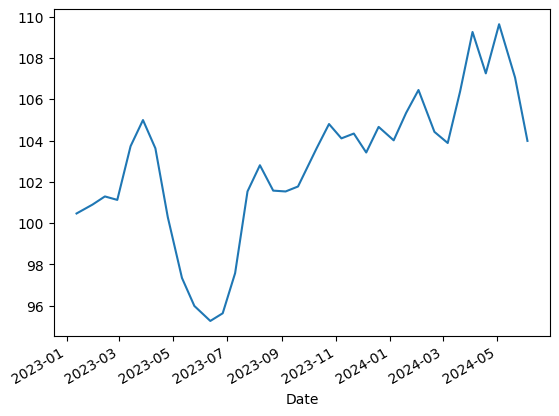

In [94]:
results.set_index('Date')['Portfolio Value'].plot()